In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('ionosphere.data', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [3]:
X = data.iloc[:, :-1] #присваивается подмножество данных, содержащее все столбцы, кроме последнего(берутся все строки и столбцы, кроме последнего)
y = data.iloc[:, -1] #присваивается подмножество данных, содержащее только последний столбец

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Переменные X_train и y_train содержат обучающую выборку, а переменные X_test и y_test содержат тестовую выборку.

In [4]:
param_grid = {
    'C': [0.1, 1, 10], # регуляризация
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}


In [5]:

svm_classifier = SVC()


grid_search = GridSearchCV(svm_classifier, param_grid, cv=5) #выполняет перекрестную проверку с использованием заданных параметров для SVM модели
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_ #нахождение лучших параметров, после чего создается новый SVM классификатор с этими данными.


best_svm_classifier = SVC(**best_params)
best_svm_classifier.fit(X_train, y_train)


train_predictions = best_svm_classifier.predict(X_train)
test_predictions = best_svm_classifier.predict(X_test)


accuracy_train = accuracy_score(y_train, train_predictions)
accuracy_test = accuracy_score(y_test, test_predictions)

recall_train = recall_score(y_train, train_predictions, pos_label='g')
recall_test = recall_score(y_test, test_predictions, pos_label='g')

precision_train = precision_score(y_train, train_predictions, pos_label='g')
precision_test = precision_score(y_test, test_predictions, pos_label='g')

f1_train = f1_score(y_train, train_predictions, pos_label='g')
f1_test = f1_score(y_test, test_predictions, pos_label='g')

#вычисление метрик: оценки качества модели (accuracy, recall, precision и f1)
print(f"Лучшие параметры: {best_params}")
print(f"Точность на обучающей выборке: {accuracy_train}")
print(f"Точность на тестовой выборке: {accuracy_test}")
print(f"Recall на обучающей выборке: {recall_train}") # полнота самой выборки
print(f"Recall на тестовой выборке: {recall_test}")
print(f"Precision на обучающей выборке: {precision_train}") # точность при выборке
print(f"Precision на тестовой выборке: {precision_test}")
print(f"F1-measure на обучающей выборке: {f1_train}")
print(f"F1-measure на тестовой выборке: {f1_test}")

Лучшие параметры: {'C': 1, 'kernel': 'rbf'}
Точность на обучающей выборке: 0.9607142857142857
Точность на тестовой выборке: 0.9295774647887324
Recall на обучающей выборке: 0.9835164835164835
Recall на тестовой выборке: 1.0
Precision на обучающей выборке: 0.9572192513368984
Precision на тестовой выборке: 0.8958333333333334
F1-measure на обучающей выборке: 0.970189701897019
F1-measure на тестовой выборке: 0.945054945054945


In [6]:
support_vectors_count = np.sum(best_svm_classifier.n_support_) #возвращает количество опорных векторов для каждого класса
print(f"Число опорных векторов: {support_vectors_count}") #показывает насколько трудоемким и ресурсозатратным оказалось обучение на заданном наборе данных

Число опорных векторов: 99


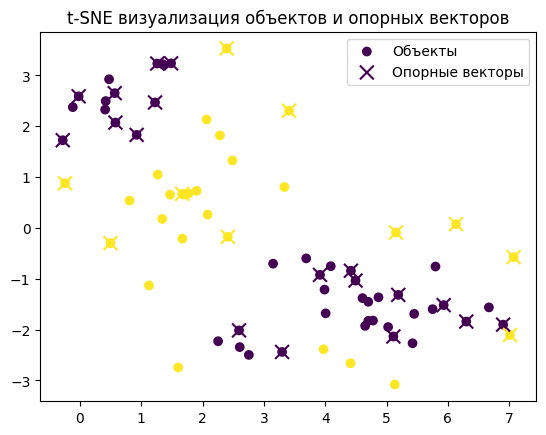

In [7]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test.map({'g': 0, 'b': 1}), cmap='viridis', marker='o', label='Объекты')
if np.sum(best_svm_classifier.n_support_) > 0:
    support_indices = np.where(best_svm_classifier.support_ < len(X_test))[0] #индексы опорных векторов
    plt.scatter(X_tsne[best_svm_classifier.support_[support_indices], 0], #построение графика рассеивания для опорных векторов
                X_tsne[best_svm_classifier.support_[support_indices], 1],
                c=y_test.iloc[best_svm_classifier.support_[support_indices]].map({'g': 0, 'b': 1}),
                cmap='viridis', marker='x', s=100, label='Опорные векторы')
plt.legend()
plt.title('t-SNE визуализация объектов и опорных векторов')
plt.show()


C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5096\732167719.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=test_predictions, cmap='viridis', marker='o', label='Объекты')
C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5096\732167719.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[best_svm_classifier.support_[support_indices], 0],


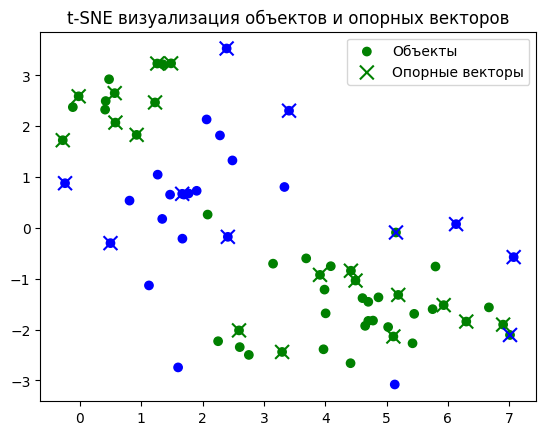

In [8]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=test_predictions, cmap='viridis', marker='o', label='Объекты')
if np.sum(best_svm_classifier.n_support_) > 0:
    support_indices = np.where(best_svm_classifier.support_ < len(X_test))[0]
    plt.scatter(X_tsne[best_svm_classifier.support_[support_indices], 0],
                X_tsne[best_svm_classifier.support_[support_indices], 1],
                c=y_test.iloc[best_svm_classifier.support_[support_indices]],
                cmap='viridis', marker='x', s=100, label='Опорные векторы')
plt.legend()
plt.title('t-SNE визуализация объектов и опорных векторов')
plt.show()


c:\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


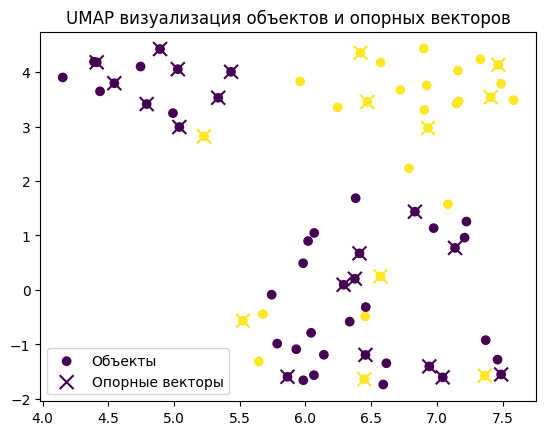

In [9]:

umap_embed = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_embed.fit_transform(X_test)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_test.map({'g': 0, 'b': 1}), cmap='viridis', marker='o', label='Объекты')

if np.sum(best_svm_classifier.n_support_) > 0:
    support_indices = np.where(best_svm_classifier.support_ < len(X_test))[0]
    plt.scatter(X_umap[best_svm_classifier.support_[support_indices], 0],
                X_umap[best_svm_classifier.support_[support_indices], 1],
                c=y_test.iloc[best_svm_classifier.support_[support_indices]].map({'g': 0, 'b': 1}),
                cmap='viridis', marker='x', s=100, label='Опорные векторы')
plt.legend()
plt.title('UMAP визуализация объектов и опорных векторов')
plt.show()

c:\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5096\2040670480.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], c=test_predictions, cmap='viridis', marker='o', label='Объекты')
C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5096\2040670480.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[best_svm_classifier.support_[support_indices], 0],


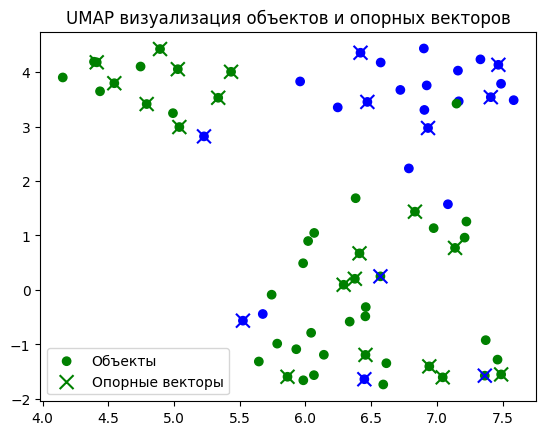

In [10]:

umap_embed = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_embed.fit_transform(X_test)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=test_predictions, cmap='viridis', marker='o', label='Объекты')

if np.sum(best_svm_classifier.n_support_) > 0:
    support_indices = np.where(best_svm_classifier.support_ < len(X_test))[0]
    plt.scatter(X_umap[best_svm_classifier.support_[support_indices], 0],
                X_umap[best_svm_classifier.support_[support_indices], 1],
                c=y_test.iloc[best_svm_classifier.support_[support_indices]],
                cmap='viridis', marker='x', s=100, label='Опорные векторы')
plt.legend()
plt.title('UMAP визуализация объектов и опорных векторов')
plt.show()

KNN

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

In [12]:

knn_classifier = KNeighborsClassifier()


grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_train, y_train)


train_predictions = best_knn_classifier.predict(X_train)
test_predictions = best_knn_classifier.predict(X_test)


accuracy_train = accuracy_score(y_train, train_predictions)
accuracy_test = accuracy_score(y_test, test_predictions)

recall_train = recall_score(y_train, train_predictions, pos_label='g')
recall_test = recall_score(y_test, test_predictions, pos_label='g')

precision_train = precision_score(y_train, train_predictions, pos_label='g')
precision_test = precision_score(y_test, test_predictions, pos_label='g')

f1_train = f1_score(y_train, train_predictions, pos_label='g')
f1_test = f1_score(y_test, test_predictions, pos_label='g')
print(f"Лучшие параметры: {best_params}")
print(f"Точность на обучающей выборке: {accuracy_train}")
print(f"Точность на тестовой выборке: {accuracy_test}")
print(f"Recall на обучающей выборке: {recall_train}")
print(f"Recall на тестовой выборке: {recall_test}")
print(f"Precision на обучающей выборке: {precision_train}")
print(f"Precision на тестовой выборке: {precision_test}")
print(f"F1-measure на обучающей выборке: {f1_train}")
print(f"F1-measure на тестовой выборке: {f1_test}")

Лучшие параметры: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Точность на обучающей выборке: 0.9214285714285714
Точность на тестовой выборке: 0.8732394366197183
Recall на обучающей выборке: 0.9835164835164835
Recall на тестовой выборке: 1.0
Precision на обучающей выборке: 0.9040404040404041
Precision на тестовой выборке: 0.8269230769230769
F1-measure на обучающей выборке: 0.9421052631578947
F1-measure на тестовой выборке: 0.9052631578947368


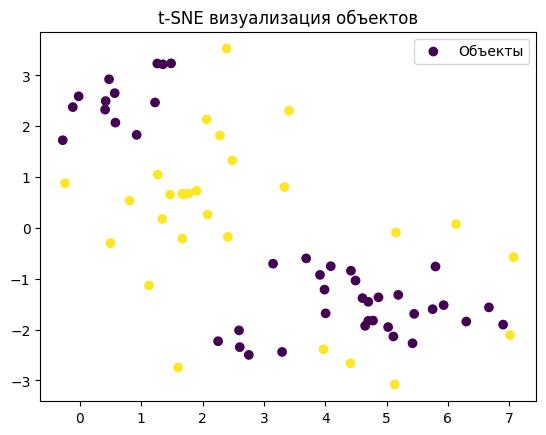

In [13]:

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)


plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test.map({'g': 0, 'b': 1}), cmap='viridis', marker='o', label='Объекты')
plt.legend()
plt.title('t-SNE визуализация объектов')
plt.show()

C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5096\875548438.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=test_predictions, cmap='viridis', marker='o', label='Объекты')


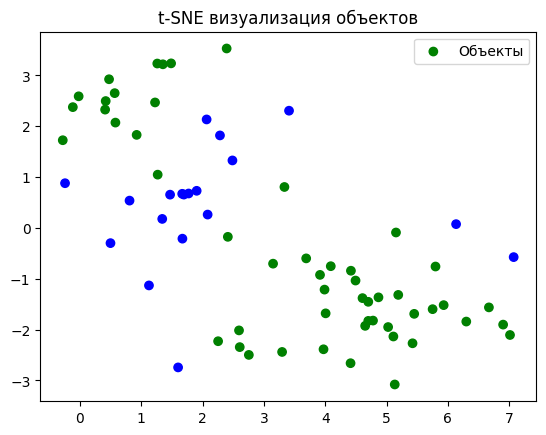

In [14]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=test_predictions, cmap='viridis', marker='o', label='Объекты')
plt.legend()
plt.title('t-SNE визуализация объектов')
plt.show()

c:\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


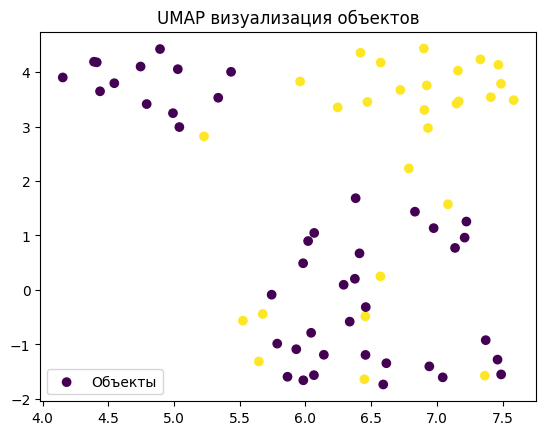

In [15]:

umap_embed = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_embed.fit_transform(X_test)


plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_test.map({'g': 0, 'b': 1}), cmap='viridis', marker='o', label='Объекты')
plt.legend()
plt.title('UMAP визуализация объектов')
plt.show()

c:\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5096\2469836840.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], c=test_predictions, cmap='viridis', marker='o', label='Объекты')


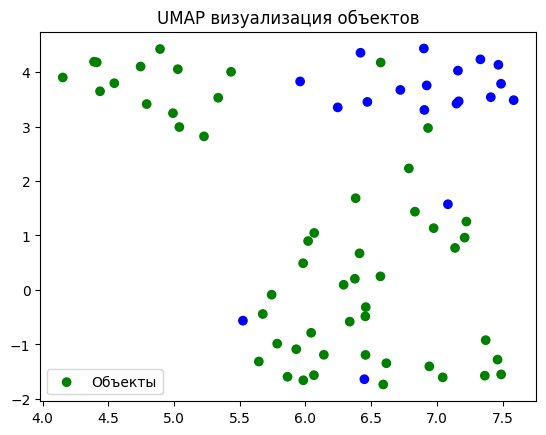

In [16]:

umap_embed = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_embed.fit_transform(X_test)


plt.scatter(X_umap[:, 0], X_umap[:, 1], c=test_predictions, cmap='viridis', marker='o', label='Объекты')
plt.legend()
plt.title('UMAP визуализация объектов')
plt.show()

RF

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [18]:

rf_classifier = RandomForestClassifier()


grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)


train_predictions = best_rf_classifier.predict(X_train)
test_predictions = best_rf_classifier.predict(X_test)


accuracy_train = accuracy_score(y_train, train_predictions)
accuracy_test = accuracy_score(y_test, test_predictions)

recall_train = recall_score(y_train, train_predictions, pos_label='g')
recall_test = recall_score(y_test, test_predictions, pos_label='g')

precision_train = precision_score(y_train, train_predictions, pos_label='g')
precision_test = precision_score(y_test, test_predictions, pos_label='g')

f1_train = f1_score(y_train, train_predictions, pos_label='g')
f1_test = f1_score(y_test, test_predictions, pos_label='g')

print(f"Лучшие параметры: {best_params}")
print(f"Точность на обучающей выборке: {accuracy_train}")
print(f"Точность на тестовой выборке: {accuracy_test}")
print(f"Recall на обучающей выборке: {recall_train}")
print(f"Recall на тестовой выборке: {recall_test}")
print(f"Precision на обучающей выборке: {precision_train}")
print(f"Precision на тестовой выборке: {precision_test}")
print(f"F1-measure на обучающей выборке: {f1_train}")
print(f"F1-measure на тестовой выборке: {f1_test}")

Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Точность на обучающей выборке: 1.0
Точность на тестовой выборке: 0.9295774647887324
Recall на обучающей выборке: 1.0
Recall на тестовой выборке: 0.9767441860465116
Precision на обучающей выборке: 1.0
Precision на тестовой выборке: 0.9130434782608695
F1-measure на обучающей выборке: 1.0
F1-measure на тестовой выборке: 0.9438202247191011


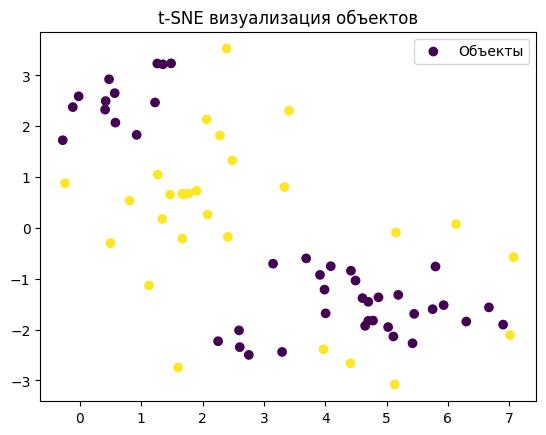

In [19]:

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test.map({'g': 0, 'b': 1}), cmap='viridis', marker='o', label='Объекты')
plt.legend()
plt.title('t-SNE визуализация объектов')
plt.show()

C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5096\2870492759.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=test_predictions, cmap='viridis', marker='o', label='Объекты')


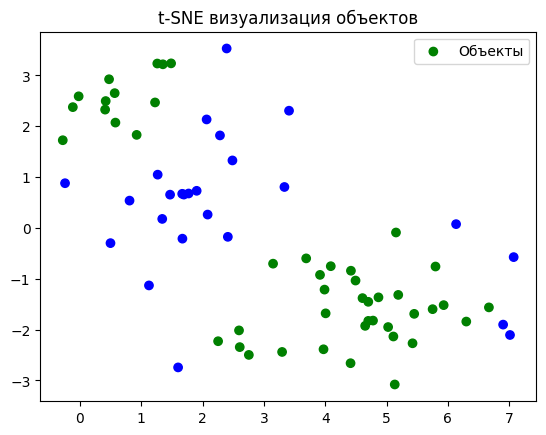

In [20]:

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=test_predictions, cmap='viridis', marker='o', label='Объекты')
plt.legend()
plt.title('t-SNE визуализация объектов')
plt.show()

c:\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


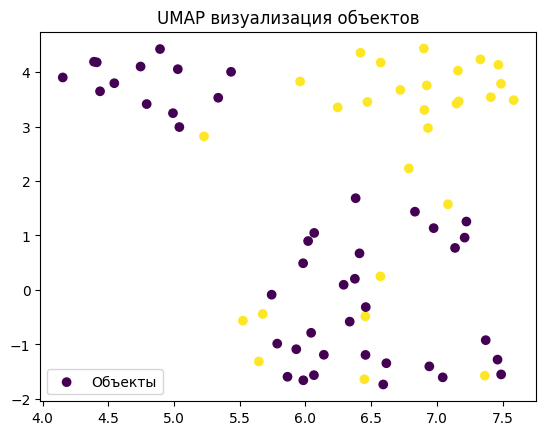

In [21]:

umap_embed = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_embed.fit_transform(X_test)


plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_test.map({'g': 0, 'b': 1}), cmap='viridis', marker='o', label='Объекты')
plt.legend()
plt.title('UMAP визуализация объектов')
plt.show()

c:\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5096\2469836840.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], c=test_predictions, cmap='viridis', marker='o', label='Объекты')


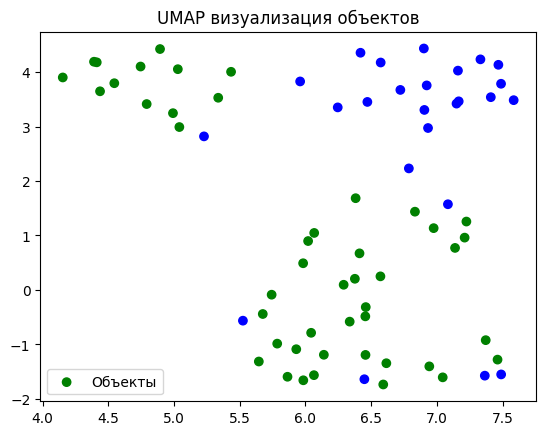

In [22]:

umap_embed = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_embed.fit_transform(X_test)


plt.scatter(X_umap[:, 0], X_umap[:, 1], c=test_predictions, cmap='viridis', marker='o', label='Объекты')
plt.legend()
plt.title('UMAP визуализация объектов')
plt.show()